In [33]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

energy_index = yf.download(
    '^GSPE',
    start = '1990-01-01',
    progress = False,
    interval = '1d',
    multi_level_index=False,
    auto_adjust=False
)

In [34]:
energy = energy_index['Close'].resample('W-FRI').last()

<Axes: xlabel='Date'>

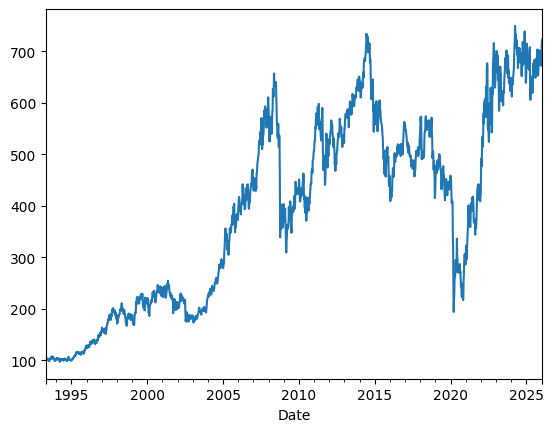

In [35]:
energy.plot()

In [36]:
product_supplied = pd.read_excel(
    '../data/commodity/EIA Weekly Supply Estimation.xlsx',
    sheet_name = 'Product Supplied',
    header = 0,
    index_col=1
).iloc[1:]
inventory = pd.read_excel(
    '../data/commodity/EIA Weekly Supply Estimation.xlsx',
    sheet_name = 'Inventory',
    header = 0,
    index_col=1
).iloc[1:]
production = pd.read_excel(
    '../data/commodity/EIA Weekly Supply Estimation.xlsx',
    sheet_name = 'Production',
    header = 0,
    index_col=1
).iloc[1:]

<Axes: >

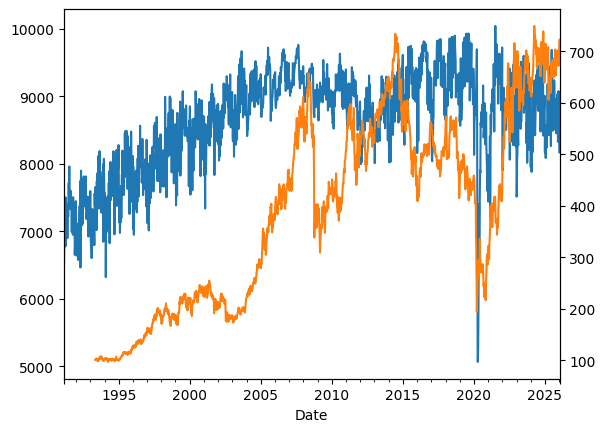

In [37]:
product_supplied['Finished Gasoline'].resample('W-FRI').last().plot()
energy.plot(secondary_y=True)

<Axes: >

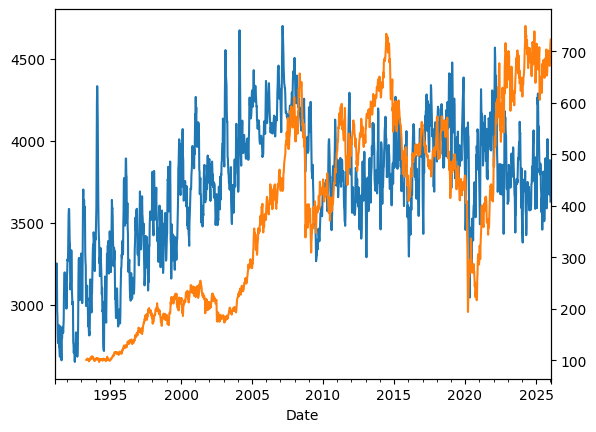

In [41]:
product_supplied['Distillate Fuel Oil'].resample('W-FRI').last().rolling(4).mean().plot()
energy.plot(secondary_y=True)

In [24]:
product_supplied

,Base Date,Time,Time Zone,Finished Gasoline,Distillate Fuel Oil
Release Date,,,,,
1991-02-13,1991-02-08,10:30:00,UTC-5,6621,3139
1991-02-20,1991-02-15,10:30:00,UTC-5,6433,3121
1991-02-27,1991-02-22,10:30:00,UTC-5,6582,2847
1991-03-06,1991-03-01,10:30:00,UTC-5,7224,2964
1991-03-13,1991-03-08,10:30:00,UTC-5,6875,3338
...,...,...,...,...,...
2025-12-10,2025-12-05,10:30:00,UTC-5,8456,4158
2025-12-17,2025-12-12,10:30:00,UTC-5,9078,3786
2025-12-24,2025-12-19,10:30:00,UTC-5,8942,4156


<Axes: >

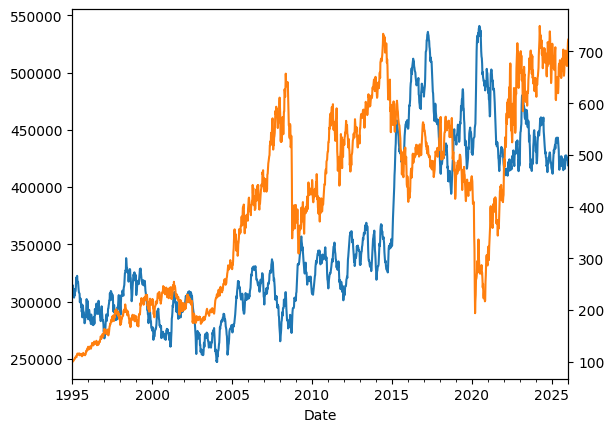

In [45]:
inventory['Stocks of Crude Oil'].resample('W-FRI').last().loc['1995':].plot()
energy.loc['1995':].plot(secondary_y=True)

<Axes: >

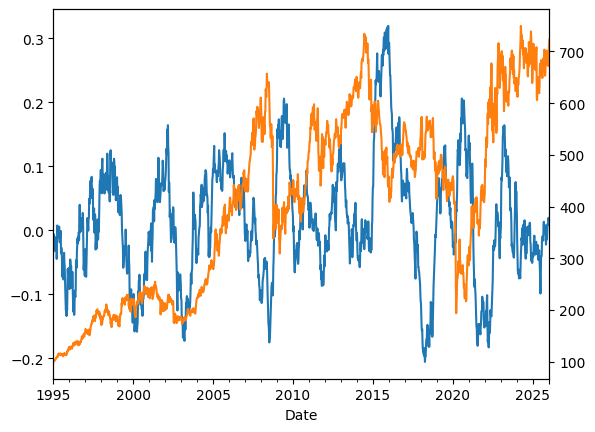

In [48]:
inventory['Stocks of Crude Oil'].resample('W-FRI').last().pct_change(52).loc['1995':].plot()
energy.loc['1995':].plot(secondary_y=True)